In [1]:
# --- ADIM 1: KURULUM VE HAZIRLIK ---
print(">>> Gerekli kütüphaneler kuruluyor...")
!pip install diffusers transformers accelerate safetensors -q
import torch
from diffusers import StableDiffusionPipeline
from google.colab import userdata
import matplotlib.pyplot as plt
print(">>> Kurulum ve hazırlık tamamlandı!")



>>> Gerekli kütüphaneler kuruluyor...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 20.6 MB/s eta 0:00:00
>>> Kurulum ve hazırlık tamamlandı!


In [2]:
# --- ADIM 2: MODELİ YÜKLEME ---
# Bu adım, internet hızına ve Colab yoğunluğuna göre birkaç dakika sürebilir.
try:
    print(">>> Hugging Face'e bağlanılıyor ve model yükleniyor...")
    token = userdata.get('HF_TOKEN')

    pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16,
        use_safetensors=True,
        token=token
    ).to("cuda")

    print(">>> Model başarıyla yüklendi ve GPU'da hazır!")
    model_yuklendi = True # Modelin yüklendiğini işaretleyelim

except Exception as e:
    print(f"❌ Bir hata oluştu: {e}")
    print(">>> Lütfen sol menüdeki anahtar (🔑) simgesinden HF_TOKEN'ınızı eklediğinizden emin olun.")
    model_yuklendi = False

>>> Hugging Face'e bağlanılıyor ve model yükleniyor...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

>>> Model başarıyla yüklendi ve GPU'da hazır!



>>> Görüntü oluşturuluyor... Lütfen bekleyin.


  0%|          | 0/30 [00:00<?, ?it/s]

>>> İşte eseriniz!


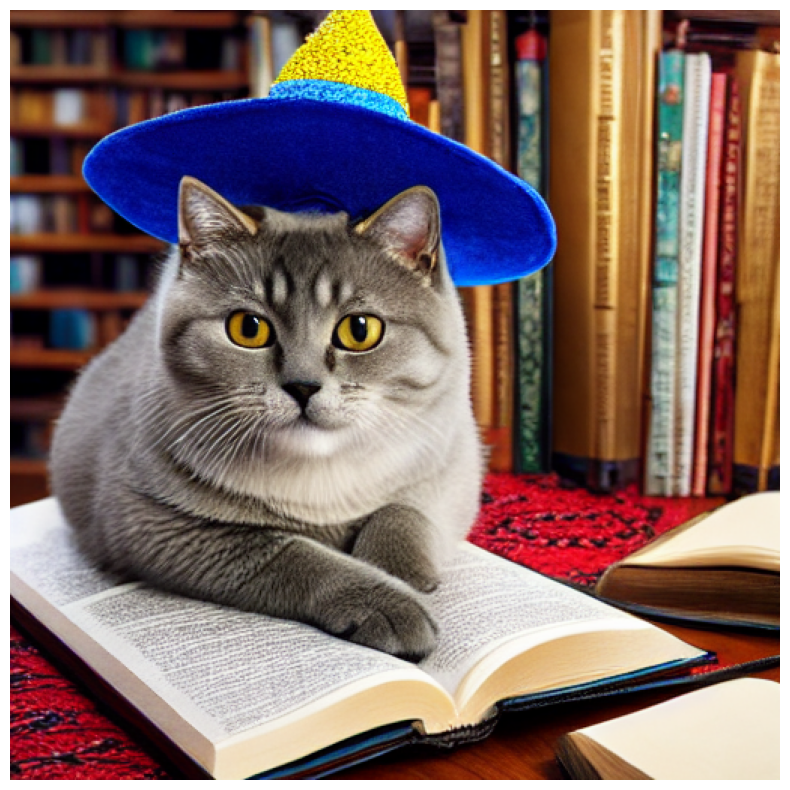

In [3]:
# --- ADIM 3: SANAT YÖNETMENLİĞİ (PROMPTLARI AYARLAMA) ---
# Model başarıyla yüklendiyse bu adıma geç.
if model_yuklendi:
    # OLUMLU PROMPT: Ne görmek istiyoruz?
    prompt = "photo of a beautiful British shorthair cat wearing a tiny wizard hat, magical library in the background, cinematic, detailed, fantasy art"

    # NEGATİF PROMPT: Neleri görmek istemiyoruz?
    # Bu kısım, sonucun kalitesini ciddi şekilde artırır.
    negative_prompt = "blurry, ugly, deformed, distorted, poor quality, bad anatomy, extra limbs, missing limbs, text, watermark, signature"

    # Ayarlar
    kalite_adimlari = 30      # Ne kadar detaylı çalışsın?
    rehberlik_skalasi = 7.5  # Hayalimize ne kadar sadık kalsın?

    # --- SİHRİ BAŞLATMA VE GÖRÜNTÜ OLUŞTURMA ---
    print("\n>>> Görüntü oluşturuluyor... Lütfen bekleyin.")

    # pipe() fonksiyonunu bu sefer negative_prompt ile birlikte çağırıyoruz.
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=kalite_adimlari,
        guidance_scale=rehberlik_skalasi
    ).images[0]

    print(">>> İşte eseriniz!")

    # --- ESERİ SERGİLEME ---
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()